In [ ]:
# import all libraries
pip install pandas numpy nltk scikit-learn tensorflow transformers matplotlib seaborn emoji wordcloud vaderSentiment textblob torch contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.8 MB/s eta 0:00:00


In [ ]:
# import all needed packages
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import torch

#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#transformers
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots

sns.set(style="whitegrid")
sns.despine()
sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 640x480 with 0 Axes>

In [ ]:
# file upload
from google.colab import files
uploaded_file = files.upload()

Saving 20220226_UkraineCombinedTweetsDeduped.csv.gzip to 20220226_UkraineCombinedTweetsDeduped.csv.gzip


In [ ]:
# file conversion from gzip to csv
import gzip
import shutil

# Specify the input and output file names
input_gzip_file = '20220226_UkraineCombinedTweetsDeduped.csv.gzip'
output_file = 'tweets'

# Open the gzip file in binary read mode
with gzip.open(input_gzip_file, 'rb') as f_in:
    # Open the output file in binary write mode
    with open(output_file, 'wb') as f_out:
        # Copy the contents of the gzip file to the output file
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# load csv into dataframe
tweets = pd.read_csv('tweets')

In [ ]:
tweets.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,26763,1282574131599486977,ripetvnews,Latest and Breaking News and Updates from all ...,NaN,4,206,4450,2020-07-13 07:16:00,1651737993785524224,...,0,NaN,0,0,NaN,False,0,0,NaN,2023-04-28 04:44:28.047048
1,26764,1227853931990208512,ESTADOPLURINAC1,Creo en la unidad de las naciones Americanas b...,NaN,3391,4259,44895,2020-02-13 07:17:27,1651738000907284483,...,174091851,NOUREEN_SHIRAZ,0,0,NaN,False,0,0,NaN,2023-04-28 04:44:28.039474
2,26765,1563060723227721728,ripeworldnews,Latest news from the World.,NaN,3,30,3031,2022-08-26 07:08:48,1651738001628700673,...,0,NaN,0,0,NaN,False,0,0,NaN,2023-04-28 04:44:28.031923
3,26766,1573017608131153920,DaikelRosendy,NaN,NaN,251,125,2742,2022-09-22 18:33:38,1651738001628704768,...,1461472325849821184,Axl77592447,0,0,NaN,False,0,0,NaN,2023-04-28 04:44:28.024352
4,26767,119881872,PrensaLatina_cu,Cuenta Oficial de la Agencia Informativa Latin...,"E #454 esq. 19 La Habana, Cuba",2323,125451,327391,2010-03-04 21:19:07,1651738002278760448,...,0,NaN,0,0,NaN,False,0,0,NaN,2023-04-28 04:44:28.016737


In [ ]:
tweets.shape

(23122, 29)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23122 entries, 0 to 23121
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23122 non-null  int64 
 1   userid                   23122 non-null  int64 
 2   username                 23122 non-null  object
 3   acctdesc                 16091 non-null  object
 4   location                 12411 non-null  object
 5   following                23122 non-null  int64 
 6   followers                23122 non-null  int64 
 7   totaltweets              23122 non-null  int64 
 8   usercreatedts            23122 non-null  object
 9   tweetid                  23122 non-null  int64 
 10  tweetcreatedts           23122 non-null  object
 11  retweetcount             23122 non-null  int64 
 12  text                     23122 non-null  object
 13  hashtags                 23122 non-null  object
 14  language                 23122 non-nul

In [ ]:
# change the date and time to panda datetime
tweets['tweetcreatedts'] = pd.to_datetime(tweets['tweetcreatedts'])

In [ ]:
# drop duplicates in dataset
tweets.drop_duplicates(inplace = True)

In [ ]:
# Print the column names to check the available columns in the DataFrame
print(tweets.columns)

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')


In [ ]:
# Drop columns that are not necessary for the analysis
# List of columns to drop
columns_to_drop = ['acctdesc', 'following','followers', 'totaltweets', 'usercreatedts', 'retweetcount', 'favorite_count', 'extractedts','is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts']

# Drop the specified columns
tweets.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# for this analysis we used location and coordinates have the same information, so drop
tweets.drop(columns=['coordinates'], inplace=True)

In [ ]:
# Drop null values in specific columns
columns_to_drop_null = ['location']
tweets = tweets.dropna(subset=columns_to_drop_null)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12411 entries, 4 to 23121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      12411 non-null  int64         
 1   userid          12411 non-null  int64         
 2   username        12411 non-null  object        
 3   location        12411 non-null  object        
 4   tweetid         12411 non-null  int64         
 5   tweetcreatedts  12411 non-null  datetime64[ns]
 6   text            12411 non-null  object        
 7   hashtags        12411 non-null  object        
 8   language        12411 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 969.6+ KB


In [ ]:
# If the "language" column is listed in the columns, check the language distribution
if "language" in tweets.columns:
    unique_lang = tweets["language"].unique()
    total_lang = len(unique_lang)
    print("Unique languages:", unique_lang)
    print("Total number of languages:", total_lang)
else:
    print("The 'language' column does not exist in the DataFrame.")

Unique languages: ['es' 'en' 'cs' 'fr' 'und' 'it' 'nl' 'in' 'de' 'vi' 'el' 'uk' 'ja' 'ru'
 'pt' 'ar' 'et' 'ta' 'da' 'ca' 'ur' 'pl' 'te' 'zh' 'sv' 'ro' 'hi' 'no'
 'tl' 'cy' 'eu' 'tr' 'bg' 'bn' 'th' 'hu' 'gu' 'fi' 'sl' 'sr' 'ko' 'lt'
 'lv']
Total number of languages: 43


In [ ]:
#extract only english tweets
tweets = tweets[tweets['language'] == 'en']

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 5 to 23121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      4464 non-null   int64         
 1   userid          4464 non-null   int64         
 2   username        4464 non-null   object        
 3   location        4464 non-null   object        
 4   tweetid         4464 non-null   int64         
 5   tweetcreatedts  4464 non-null   datetime64[ns]
 6   text            4464 non-null   object        
 7   hashtags        4464 non-null   object        
 8   language        4464 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 348.8+ KB


In [ ]:
#check for the shape of english tweets extracted
tweets.head(20)

,Unnamed: 0,userid,username,location,tweetid,tweetcreatedts,text,hashtags,language
5,26768,1612675641941311491,RabiaSalem02,Libya,1651738023594262532,2023-04-28 00:00:07,Ukrainian forces blow up Russian ammo depot in...,"[{'text': 'UkraineRussianWar', 'indices': [74,...",en
7,26770,1614799771889172480,belal4abty,ليبيا,1651738050190356480,2023-04-28 00:00:13,Ukrainian Drone Targets Frontline Russians/Ukr...,"[{'text': 'Canada', 'indices': [82, 89]}, {'te...",en
8,26771,771585859996921857,diypotus,The White House,1651738059145093127,2023-04-28 00:00:15,Joe Biden and the Struggle for America’s Soul ...,"[{'text': 'USPolitics', 'indices': [74, 85]}, ...",en
13,26776,771585859996921857,diypotus,The White House,1651738127873064960,2023-04-28 00:00:32,Former US Vice President Pence testifies befor...,"[{'text': 'USPolitics', 'indices': [87, 98]}, ...",en
18,26781,1614799771889172480,belal4abty,ليبيا,1651738151902117891,2023-04-28 00:00:37,HORRIBLE ATTACK!! U 10th Brigade Destroy Vehic...,"[{'text': 'Canada', 'indices': [86, 93]}, {'te...",en
19,26782,835948447,BlackNativeBro,"Florida, USA",1651738154171334661,2023-04-28 00:00:38,The fight in Bakhmut still continues. The stor...,"[{'text': 'ukrainecounteroffensive', 'indices'...",en
21,26784,828355200532373504,Katniir,"British Columbia, Canada",1651738160068706304,2023-04-28 00:00:39,"#Bakhmut. I have no words, sorry. https://t.co...","[{'text': 'Bakhmut', 'indices': [0, 8]}]",en
28,26791,1612668913216618496,badry_98,Libya,1651738309478035458,2023-04-28 00:01:15,ukraine war video footage😭😳😱 #war #ukraine #sh...,"[{'text': 'war', 'indices': [29, 33]}, {'text'...",en
34,26797,47776856,GueberB,ישראל,1651738413198966784,2023-04-28 00:01:40,🚫NATO #Ucrania #Rusia #Russia #Ukraine 🇷🇺🇺🇦\n⚡...,"[{'text': 'Ucrania', 'indices': [6, 14]}, {'te...",en
49,26812,1281618367246458880,Bobby39502774,"Québec, Canada",1651738718452023300,2023-04-28 00:02:52,Successful #Ukrainian assault on #Russian posi...,"[{'text': 'Ukrainian', 'indices': [11, 21]}, {...",en


In [ ]:
# Visualizing the dataset by location
# tweets_per_country = tweets['location'].value_counts().reset_index(name='counts')

tweets_per_country = tweets['location'].value_counts().loc[lambda x : x > 20].reset_index(name='counts')

In [ ]:
tweets_per_country.head(30)

,index,counts
0,libya,697
1,ليبيا,283
2,kentucki usa,206
3,ukrain,177
4,eu usa israel,128
5,kyiv ukrain,92
6,indonesia,88
7,украина,53
8,unit state,53
9,україна,52


<ipython-input-103-875a6b410d71>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')


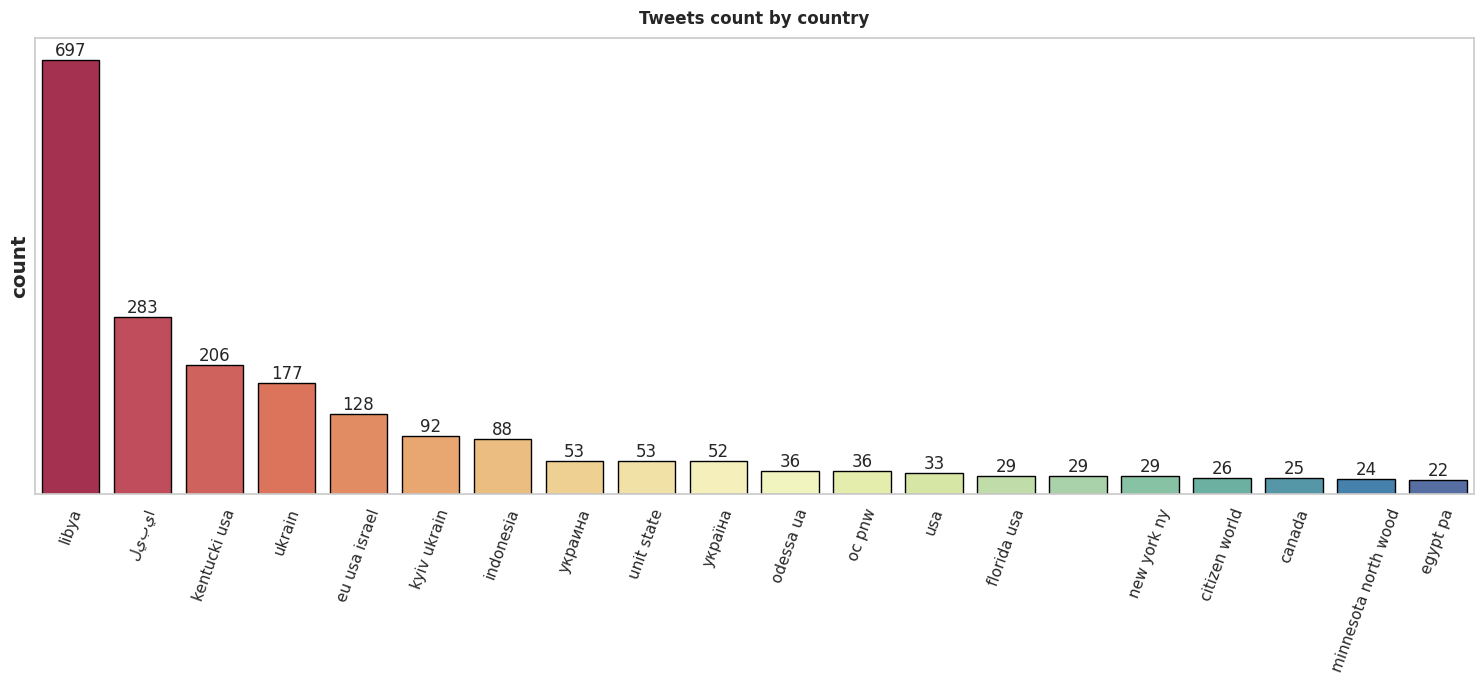

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')
plt.title('Tweets count by country')
plt.xticks(rotation=70)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# remove contractions from text in tweets
import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [ ]:
# remove contractions from text in tweets to fix errors in cell execution
import contractions

def expand_contractions(text):
    try:
        expanded_text = contractions.fix(text)
        return expanded_text
    except IndexError:
        # Handle the IndexError here, for example:
        print("IndexError occurred while expanding contractions for:", text)
        return text  # Return the original text as a fallback

# Apply the expand_contractions function to the text column in the dataset
tweets['text'] = tweets['text'].apply(expand_contractions)

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 5 to 23121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      4464 non-null   int64         
 1   userid          4464 non-null   int64         
 2   username        4464 non-null   object        
 3   location        4464 non-null   object        
 4   tweetid         4464 non-null   int64         
 5   tweetcreatedts  4464 non-null   datetime64[ns]
 6   text            4464 non-null   object        
 7   hashtags        4464 non-null   object        
 8   language        4464 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 348.8+ KB


In [ ]:
# data cleaning and stopwords removal
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()                  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)        # Remove square brackets and their content
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs or website links
    text = re.sub('<.*?>+', '', text)         # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('@', '', text)  # Remove "@" symbols
    text = re.sub('#', '', text)  # Remove "#" symbols
    text = re.sub('\n', '', text)             # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)       # Remove words containing numbers

    # Tokenize the text and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopword]

    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words back into a string
    text = " ".join(stemmed_words)

    return text

tweets['text'] = tweets['text'].apply(clean)       # Apply the clean function to the "text" column
tweets['location'] = tweets['location'].apply(clean) # Apply the clean function to the "location" column

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# define function to remove emojis
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001F000-\U0001F0CF"  # Mahjong Tiles
                               u"\U0001F170-\U0001F251"  # Enclosed Ideographic Supplement
                               u"\U0001F2E0-\U0001F2FF"  # Supplemental Arrows-A
                               u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the function to the text column
tweets['text'] = tweets['text'].apply(remove_emojis)
tweets['location'] = tweets['location'].apply(remove_emojis)

In [ ]:
tweets['text'][1:10].values

array(['ukrainian drone target frontlin russiansukrain newsukrain war video footagecanada germani america ukrain bakhmut',
       'joe biden struggl america soul uspolit elonmusk biden ukrainerussiawar',
       'former us vice presid penc testifi grand juri uspolit elonmusk biden ukrainerussiawar',
       'horribl attack brigad destroy vehicl r troop artilleri near kherson canada germani america ukrain bakhmut',
       'fight bakhmut still continu stori encircl untru recaptur ground invad destroy larg number ⚰️☠️ ukrainecounteroffens ukrainefrontlin bakhmut deadrussiansoldi russiaiscollaps',
       'bakhmut word sorri',
       'ukrain war video footage war ukrain short shortcanada germani america ukrain bakhmut',
       'nato ucrania rusia russia ukrain ⚡️kiev regim make attempt destroy ukrainian orthodox church zelenski use repress measur attempt prolong existencezelenski seek boot church countryrussian foreign ministri spokeswoman zakharova',
       'success ukrainian assault russian

In [ ]:
# Let's check for the length of each tweets to see if we took off too much text during cleaning
text_len = []
for text in tweets.text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
tweets['text_len'] = text_len

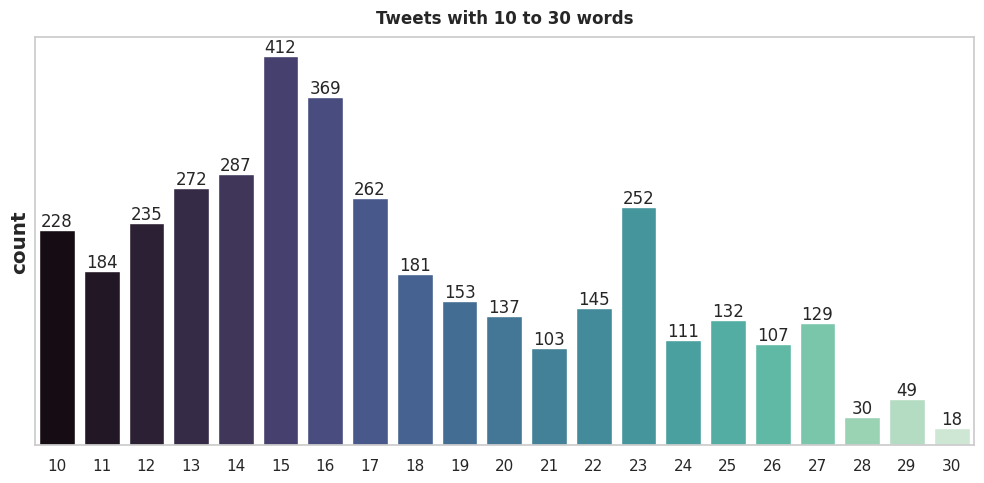

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='text_len', data=tweets[(tweets['text_len'] >= 10) & (tweets['text_len'] <= 30)], palette='mako')
# ax = sns.countplot(x='text_len', data=tweets[tweets['text_len']>10], palette='mako')
plt.title('Tweets with 10 to 30 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

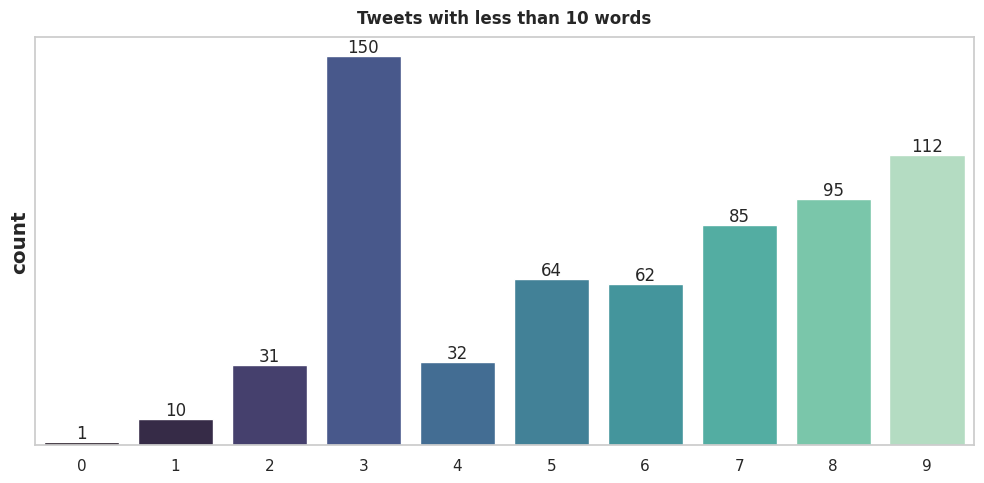

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='text_len', data=tweets[tweets['text_len']<10], palette='mako')
plt.title('Tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# Extract the desired columns from the original DataFrame
selected_columns = tweets[['location', 'text', 'tweetcreatedts']]

# Create a new DataFrame using the selected columns
tweets = pd.DataFrame(selected_columns)

# Display the new DataFrame
print(tweets)

            location                                               text  \
5              libya  ukrainian forc blow russian ammo depot huge ex...   
7              ليبيا  ukrainian drone target frontlin russiansukrain...   
8         white hous  joe biden struggl america soul uspolit elonmus...   
13        white hous  former us vice presid penc testifi grand juri ...   
18             ليبيا  horribl attack brigad destroy vehicl r troop a...   
...              ...                                                ...   
23112          libya  gopro footag ukrainian troop brutal battl war ...   
23114          ليبيا  ukrain militari summari analysi canada germani...   
23116  citizen world  see polish nazi lviv take russian crimea circu...   
23117     unit state  tax go ukrainian nazi price grown pay fascist ...   
23121  citizen world  see polish nazi lviv take russian crimea circu...   

           tweetcreatedts  
5     2023-04-28 00:00:07  
7     2023-04-28 00:00:13  
8     2023-04-2

In [ ]:
tweets = tweets.reset_index(drop=True)

# Display the DataFrame with the default numerical index
print(tweets)

           location                                               text  \
0             libya  ukrainian forc blow russian ammo depot huge ex...   
1             ليبيا  ukrainian drone target frontlin russiansukrain...   
2        white hous  joe biden struggl america soul uspolit elonmus...   
3        white hous  former us vice presid penc testifi grand juri ...   
4             ليبيا  horribl attack brigad destroy vehicl r troop a...   
...             ...                                                ...   
4459          libya  gopro footag ukrainian troop brutal battl war ...   
4460          ليبيا  ukrain militari summari analysi canada germani...   
4461  citizen world  see polish nazi lviv take russian crimea circu...   
4462     unit state  tax go ukrainian nazi price grown pay fascist ...   
4463  citizen world  see polish nazi lviv take russian crimea circu...   

          tweetcreatedts  
0    2023-04-28 00:00:07  
1    2023-04-28 00:00:13  
2    2023-04-28 00:00:15  
3  

In [ ]:
# VADER Lexicon Sentiment Analyzer to assign sentiments to the tweets
import nltk

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
text = "I love this product. It's amazing!"
sentiment_scores = sia.polarity_scores(text)
compound_score = sentiment_scores['compound']

if compound_score > 0.05:
    sentiment = 'positive'
elif compound_score < -0.05:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Apply Vader Lexicon to dataframe to assign sentiments
tweets['text'] = tweets['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
tweets['sentiment_scores'] = tweets['text'].apply(lambda x: sia.polarity_scores(x))
tweets['compound_sentiment'] = tweets['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0.05 else 'negative' if x['compound'] < -0.05 else 'neutral')

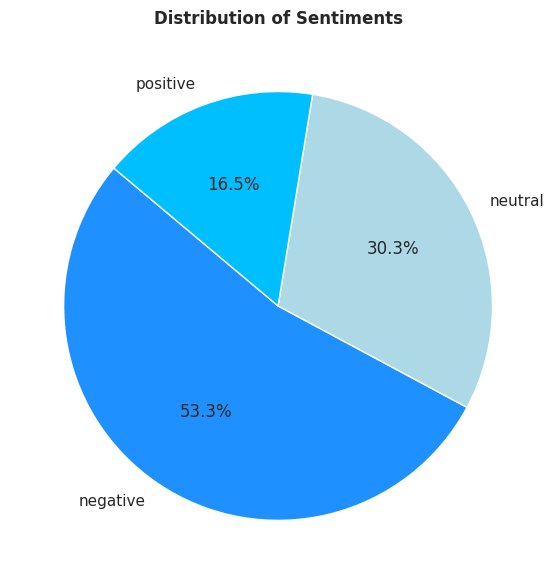

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment type
sentiment_counts = tweets['compound_sentiment'].value_counts()

# Define cooler colors
cooler_colors = ['dodgerblue', 'lightblue', 'deepskyblue']

# Plot a pie chart with cooler colors
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=cooler_colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.show()


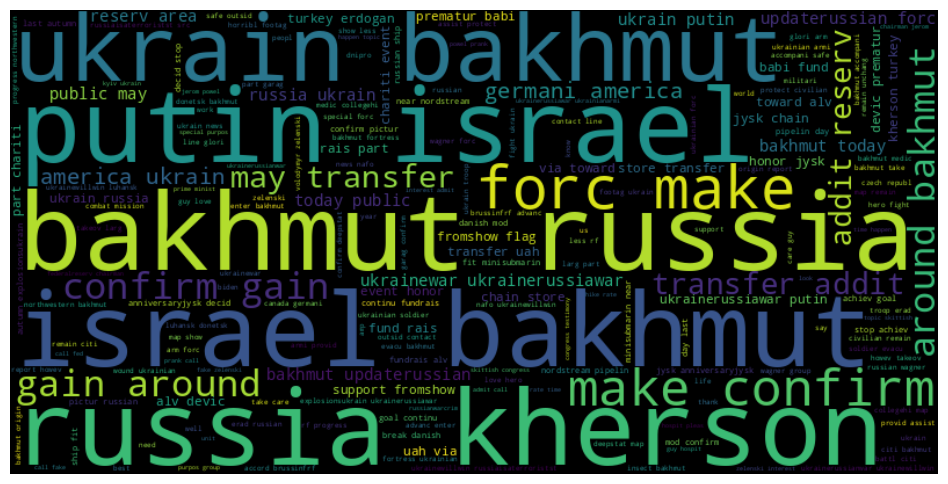

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the dataframe for positive sentiments
positive_tweets = tweets[tweets['compound_sentiment'] == 'positive']

# Combine the text data from the 'text' column of positive tweets
positive_text = ' '.join(positive_tweets['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

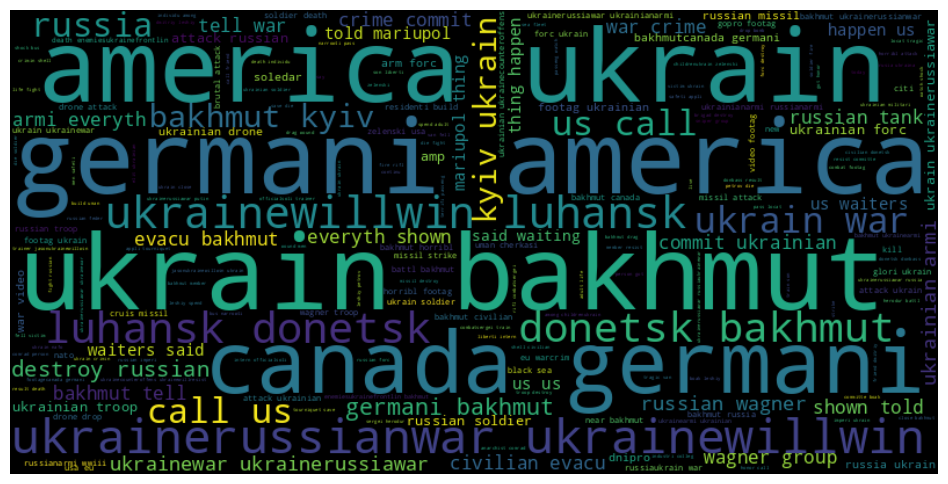

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the dataframe for negative sentiments
negative_tweets = tweets[tweets['compound_sentiment'] == 'negative']

# Combine the text data from the 'text' column of negative tweets
negative_text = ' '.join(negative_tweets['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(negative_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

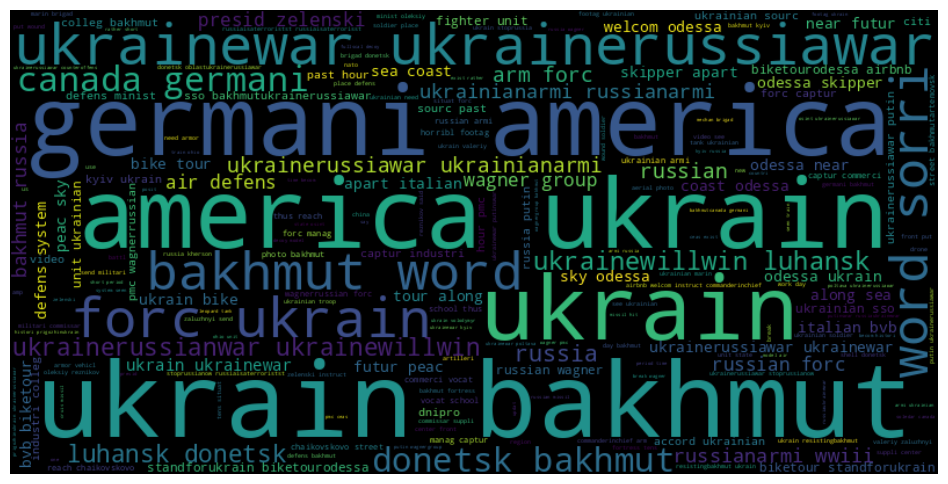

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter the dataframe for neutral sentiments
neutral_tweets = tweets[tweets['compound_sentiment'] == 'neutral']

# Combine the text data from the 'text' column of neutral tweets
neutral_text = ' '.join(neutral_tweets['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(neutral_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a mapping of sentiment labels to numerical labels
sentiment_to_label = {'positive': 0, 'negative': 1, 'neutral': 2}

# Apply the mapping to create the 'labels' column
tweets['labels'] = tweets['compound_sentiment'].apply(lambda x: sentiment_to_label[x])

In [ ]:
# BERT Sentiment Analysis Modelling
# Load BERT tokenizer and model
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Split data into train and test
train_data, test_data = train_test_split(tweets, test_size=0.2, random_state=42)

# Further split train data into train and validation
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# define maximum length of tokens
MAX_LEN = 128

In [ ]:
# define function for BERT tokenizer
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    # return np.array(input_ids),np.array(attention_masks)
    return np.array(input_ids, dtype=object), np.array(attention_masks, dtype=object)


In [ ]:
# duplicate test data retaining the true labels
test_data_with_true_labels = test_data.copy()

In [ ]:
# drop test data labels for predictions after training
test_data = test_data.drop(columns=['labels'])

In [ ]:
# Define your training, validation, and test text data
X_train = train_data['text'].values
X_valid = val_data['text'].values
X_test = test_data['text'].values

In [ ]:
MAX_LEN = 128

# Tokenize the data
bert_train_input_ids, bert_train_attention_masks = tokenize(X_train, MAX_LEN)
bert_val_input_ids, bert_val_attention_masks = tokenize(X_valid, MAX_LEN)
bert_test_input_ids, bert_test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
# Function to pad sequences to MAX_LEN
def pad_sequences(sequences, max_len):
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
        sequences,
        maxlen=max_len,
        dtype='int32',
        padding='post',
        truncating='post'
    )
    return padded_sequences

# Pad sequences to MAX_LEN
bert_train_input_ids = pad_sequences(bert_train_input_ids, MAX_LEN)
bert_train_attention_masks = pad_sequences(bert_train_attention_masks, MAX_LEN)

bert_val_input_ids = pad_sequences(bert_val_input_ids, MAX_LEN)
bert_val_attention_masks = pad_sequences(bert_val_attention_masks, MAX_LEN)

bert_test_input_ids = pad_sequences(bert_test_input_ids, MAX_LEN)
bert_test_attention_masks = pad_sequences(bert_test_attention_masks, MAX_LEN)

In [ ]:
bert_train_labels = train_data['labels'].tolist()
bert_val_labels = val_data['labels'].tolist()

In [ ]:
bert_train_input_ids = np.array(bert_train_input_ids)
bert_train_attention_masks = np.array(bert_train_attention_masks)
bert_train_labels = np.array(bert_train_labels)

bert_val_input_ids = np.array(bert_val_input_ids)
bert_val_attention_masks = np.array(bert_val_attention_masks)
bert_val_labels = np.array(bert_val_labels)

In [ ]:
MAX_LEN = 128

def create_model(bert_model, max_len=MAX_LEN):

    ##parameters###
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    embeddings = bert_model([input_ids, attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    model.compile(optimizer, loss=loss, metrics=[accuracy])

    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
# bert model training using .fit
history_bert = model.fit(
    [bert_train_input_ids, bert_train_attention_masks],
    bert_train_labels,
    validation_data=([bert_val_input_ids, bert_val_attention_masks], bert_val_labels),
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
90/90 [==============================] - 126s 922ms/step - loss: 0.6143 - sparse_categorical_accuracy: 0.7486 - val_loss: 0.3227 - val_sparse_categorical_accuracy: 0.8825
Epoch 2/5
90/90 [==============================] - 80s 892ms/step - loss: 0.2121 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.2816 - val_sparse_categorical_accuracy: 0.9119
Epoch 3/5
90/90 [==============================] - 80s 890ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9755 - val_loss: 0.2655 - val_sparse_categorical_accuracy: 0.9245
Epoch 4/5
90/90 [==============================] - 80s 894ms/step - loss: 0.0486 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.2863 - val_sparse_categorical_accuracy: 0.9259
Epoch 5/5
90/90 [==============================] - 80s 891ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.2895 - val_sparse_categorical_accuracy: 0.9231


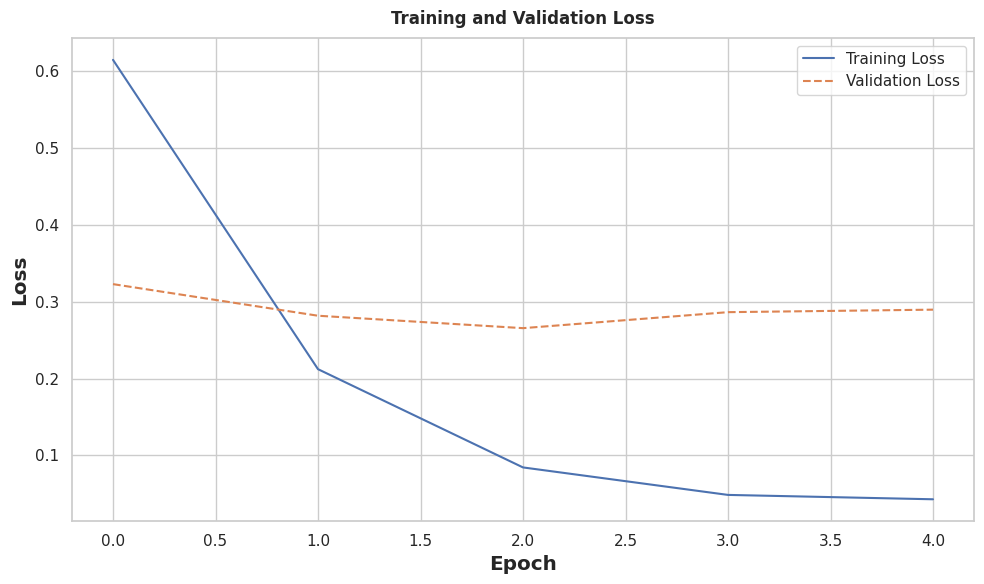

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_bert.history['loss'], label='Training Loss')
plt.plot(history_bert.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

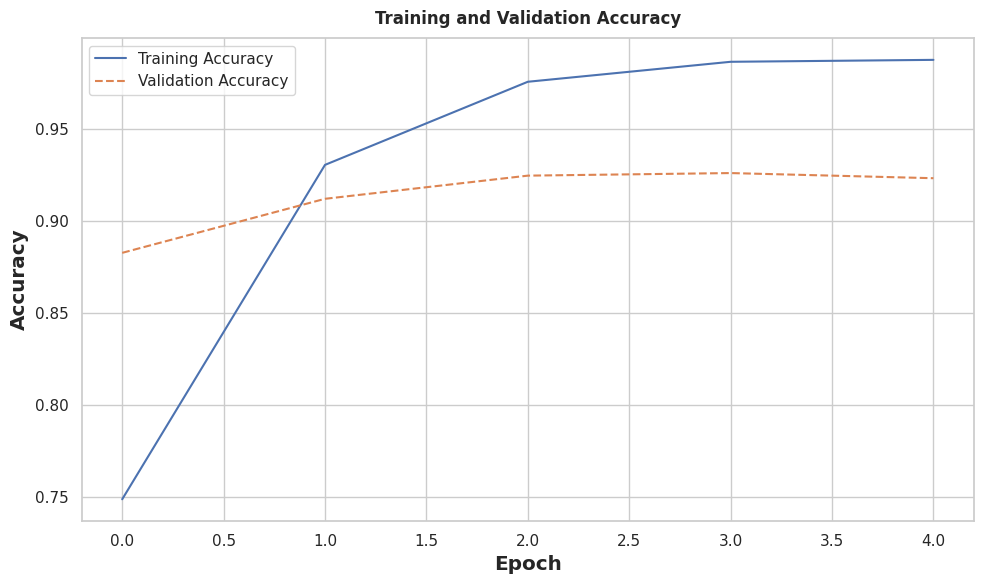

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_bert.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history_bert.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
bert_test_input_ids = np.array(bert_test_input_ids)
bert_test_attention_masks = np.array(bert_test_attention_masks)

In [ ]:
# bert model evaluation using the test data set
print('Model Evaluation using Test Data')
result_bert = model.predict([bert_test_input_ids,bert_test_attention_masks])

Model Evaluation using Test Data
28/28 [==============================] - 11s 294ms/step


In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
y_pred_bert = np.argmax(y_pred_bert, axis=1)

In [ ]:
test_data['predicted_label'] = y_pred_bert

In [ ]:
def conf_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
true_labels = test_data_with_true_labels['labels'].tolist()

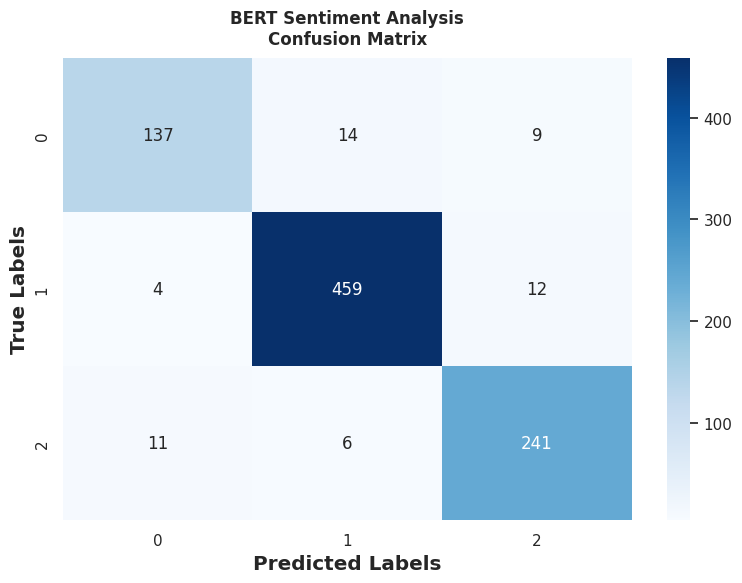

In [ ]:
conf_matrix(true_labels, y_pred_bert, 'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(true_labels,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88       160
     Neutral       0.96      0.97      0.96       475
    Positive       0.92      0.93      0.93       258

    accuracy                           0.94       893
   macro avg       0.93      0.92      0.92       893
weighted avg       0.94      0.94      0.94       893



In [ ]:
# RoBERTa Sentiment Analysis Modelling
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

119

In [ ]:
MAX_LEN=200

In [ ]:
def tokenize_roberta(data, max_len=MAX_LEN):
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

In [ ]:
roberta_train_input_ids, roberta_train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
roberta_val_input_ids, roberta_val_attention_masks = tokenize_roberta(X_valid, MAX_LEN)
roberta_test_input_ids, roberta_test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

In [ ]:
# Prepare input data
roberta_train_labels = train_data['labels'].tolist()

roberta_val_labels = val_data['labels'].tolist()

In [ ]:
roberta_train_input_ids = np.array(roberta_train_input_ids)
roberta_train_attention_masks = np.array(roberta_train_attention_masks)
roberta_train_labels = np.array(roberta_train_labels)

roberta_val_input_ids = np.array(roberta_val_input_ids)
roberta_val_attention_masks = np.array(roberta_val_attention_masks)
roberta_val_labels = np.array(roberta_val_labels)

In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
MAX_LEN = 200
def create_roberta_model(roberta_model, max_len=MAX_LEN):

    # Define optimizer, loss function, and accuracy metric
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Define input layers for input IDs and attention masks
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    # Pass the input through the RoBERTa model
    output = roberta_model([input_ids, attention_masks])[0]

    # Add a Dense layer for classification
    output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)

    # Create the final model
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compile the model with optimizer, loss, and metrics
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])

    return model


In [ ]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 el)                            thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 200,                                         

In [ ]:
# roberta model training using .fit
history_2 = model.fit(
    x=[roberta_train_input_ids, roberta_train_attention_masks],  # List of input arrays
    y=roberta_train_labels,  # Output labels
    validation_data=(
        [roberta_val_input_ids, roberta_val_attention_masks], roberta_val_labels
    ),
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
90/90 [==============================] - 176s 2s/step - loss: 0.7296 - sparse_categorical_accuracy: 0.6842 - val_loss: 0.5838 - val_sparse_categorical_accuracy: 0.8196
Epoch 2/5
90/90 [==============================] - 126s 1s/step - loss: 0.2970 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8741
Epoch 3/5
90/90 [==============================] - 126s 1s/step - loss: 0.1531 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.3068 - val_sparse_categorical_accuracy: 0.9091
Epoch 4/5
90/90 [==============================] - 126s 1s/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.3577 - val_sparse_categorical_accuracy: 0.9161
Epoch 5/5
90/90 [==============================] - 126s 1s/step - loss: 0.0546 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.3132 - val_sparse_categorical_accuracy: 0.9273


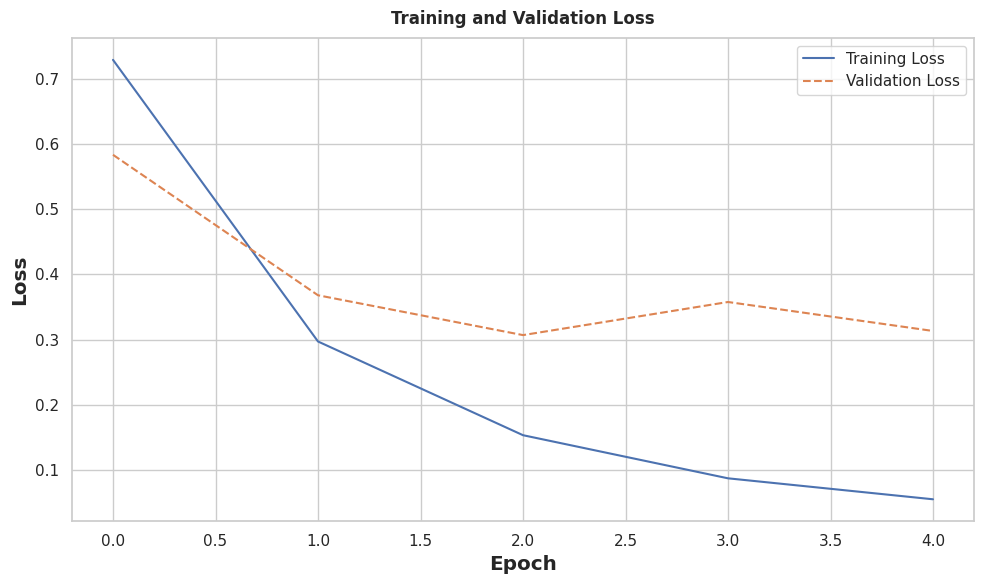

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

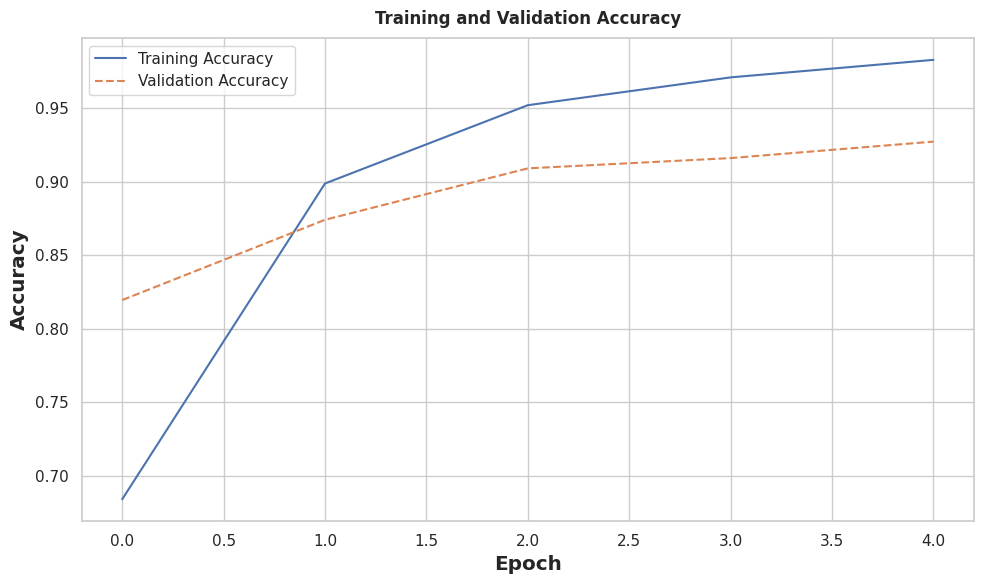

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# roberta model evaluation using the test data set
print('Model Evaluation using Test Data')
result_roberta = model.predict([roberta_test_input_ids,roberta_test_attention_masks])

Model Evaluation using Test Data
28/28 [==============================] - 15s 435ms/step


In [ ]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

In [ ]:
y_pred_roberta = np.argmax(y_pred_roberta, axis=1)

In [ ]:
roberta_test_data = test_data_with_true_labels.copy()

In [ ]:
roberta_test_data = roberta_test_data.drop(columns=['labels'])

In [ ]:
roberta_test_data['predicted_label'] = y_pred_roberta

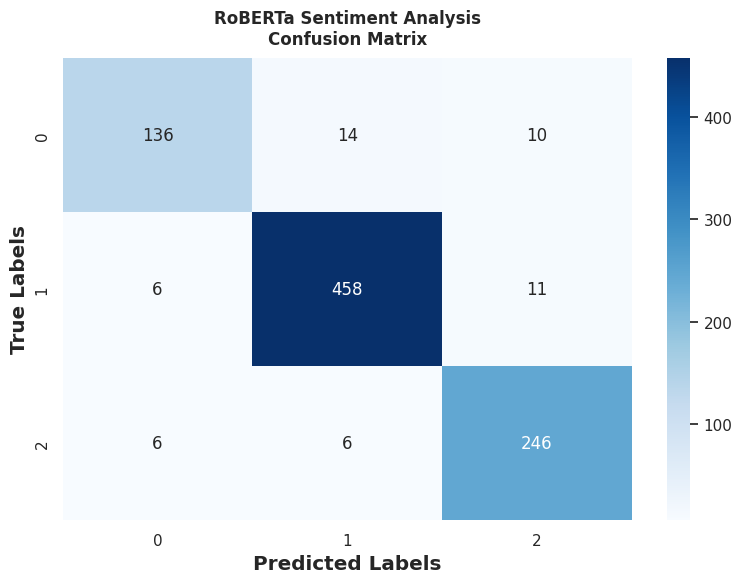

In [ ]:
conf_matrix(true_labels, y_pred_roberta, 'RoBERTa Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for RoBERTa:\n\n',classification_report(true_labels,y_pred_roberta, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.92      0.85      0.88       160
     Neutral       0.96      0.96      0.96       475
    Positive       0.92      0.95      0.94       258

    accuracy                           0.94       893
   macro avg       0.93      0.92      0.93       893
weighted avg       0.94      0.94      0.94       893



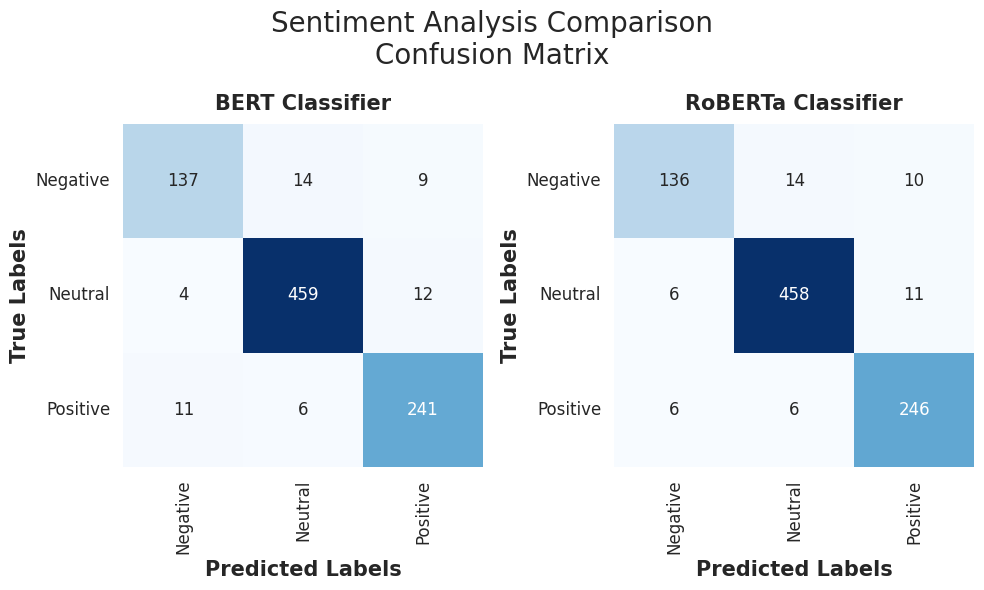

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison\nConfusion Matrix', fontsize=20)

# Plot BERT confusion matrix
sns.heatmap(confusion_matrix(true_labels, y_pred_bert), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[0], annot_kws={"size":12})
ax[0].set_title('BERT Classifier', fontsize=15)
ax[0].set_yticklabels(labels, fontsize=12, rotation='horizontal')
ax[0].set_xticklabels(labels, fontsize=12, rotation='vertical')
ax[0].set_ylabel('True Labels', fontsize=15)
ax[0].set_xlabel('Predicted Labels', fontsize=15)

# Plot RoBERTa confusion matrix
sns.heatmap(confusion_matrix(true_labels, y_pred_roberta), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1], annot_kws={"size":12})
ax[1].set_title('RoBERTa Classifier', fontsize=15)
ax[1].set_yticklabels(labels, fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(labels, fontsize=12, rotation='vertical')
ax[1].set_ylabel('True Labels', fontsize=15)
ax[1].set_xlabel('Predicted Labels', fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# For BERT
bert_classification_report = classification_report(true_labels, y_pred_bert, target_names=['Negative', 'Neutral', 'Positive'])
print('\tClassification Report for BERT:\n\n', bert_classification_report)

# For RoBERTa
roberta_classification_report = classification_report(true_labels, y_pred_roberta, target_names=['Negative', 'Neutral', 'Positive'])
print('\tClassification Report for RoBERTa:\n\n', roberta_classification_report)


	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88       160
     Neutral       0.96      0.97      0.96       475
    Positive       0.92      0.93      0.93       258

    accuracy                           0.94       893
   macro avg       0.93      0.92      0.92       893
weighted avg       0.94      0.94      0.94       893

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.92      0.85      0.88       160
     Neutral       0.96      0.96      0.96       475
    Positive       0.92      0.95      0.94       258

    accuracy                           0.94       893
   macro avg       0.93      0.92      0.93       893
weighted avg       0.94      0.94      0.94       893

